In [2]:
%matplotlib inline
%pip install scipy

import piplite
await piplite.install('seaborn')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [5]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [6]:
country = data.pivot_table(columns=['Country'], aggfunc='size').sort_values(ascending=False).head(15)
country

Country
United States of America                                3954
Germany                                                 1072
Brazil                                                   890
Russian Federation                                       889
Italy                                                    866
India                                                    794
Japan                                                    498
United Kingdom of Great Britain and Northern Ireland     454
France                                                   454
China                                                    431
Philippines                                              359
Mexico                                                   326
Spain                                                    293
Netherlands                                              265
Belgium                                                  254
dtype: int64

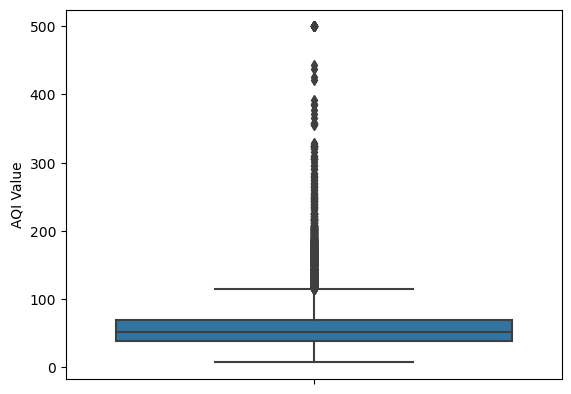

In [29]:
##data['AQI Value'].plot(kind='boxplot')
sns.boxplot( y=data['AQI Value'] );
plt.show()

In [8]:
IQR = np.quantile(data['AQI Value'], 0.75) - np.quantile(data['AQI Value'], 0.25)
IQR

30.5

In [9]:
np.quantile(data['AQI Value'], 0.75), np.quantile(data['AQI Value'], 0.25)

(69.0, 38.5)

In [10]:
np.quantile(data['AQI Value'], 0.5) == data['AQI Value'].median(), np.quantile(data['AQI Value'], 0.5)

(True, 52.0)

In [11]:
data['AQI Value'].min(), data['AQI Value'].max()

(7, 500)

<AxesSubplot:>

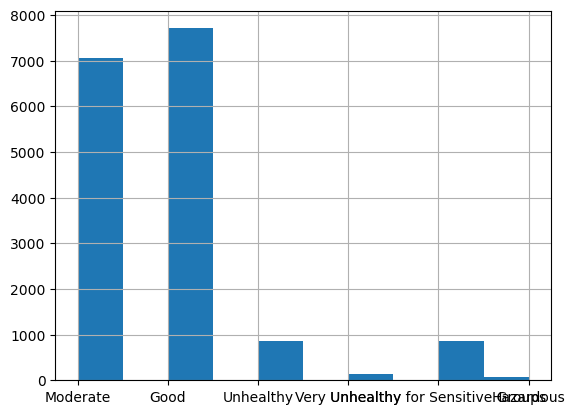

In [12]:
data['AQI Category'].hist()

<AxesSubplot:>

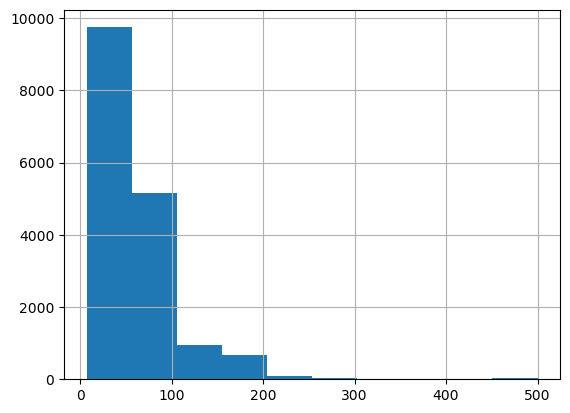

In [13]:
data['AQI Value'].hist()

### Сглаженное распределение пациентов по индексу качества воздуха

<AxesSubplot:ylabel='Density'>

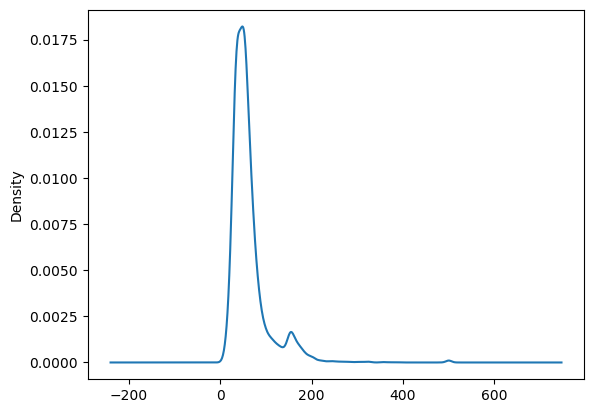

In [14]:
data['AQI Value'].plot(kind='kde')

<AxesSubplot:ylabel='AQI Value'>

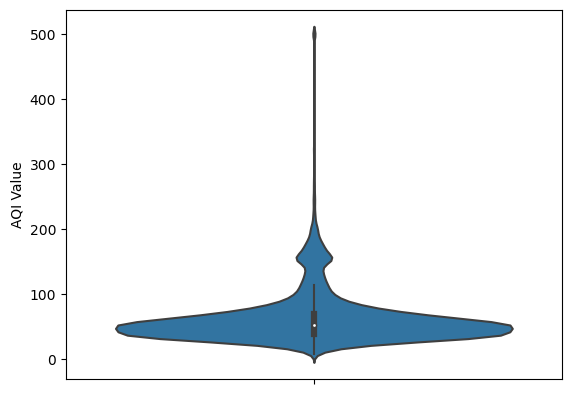

In [15]:
sns.violinplot(y = 'AQI Value', data = data)

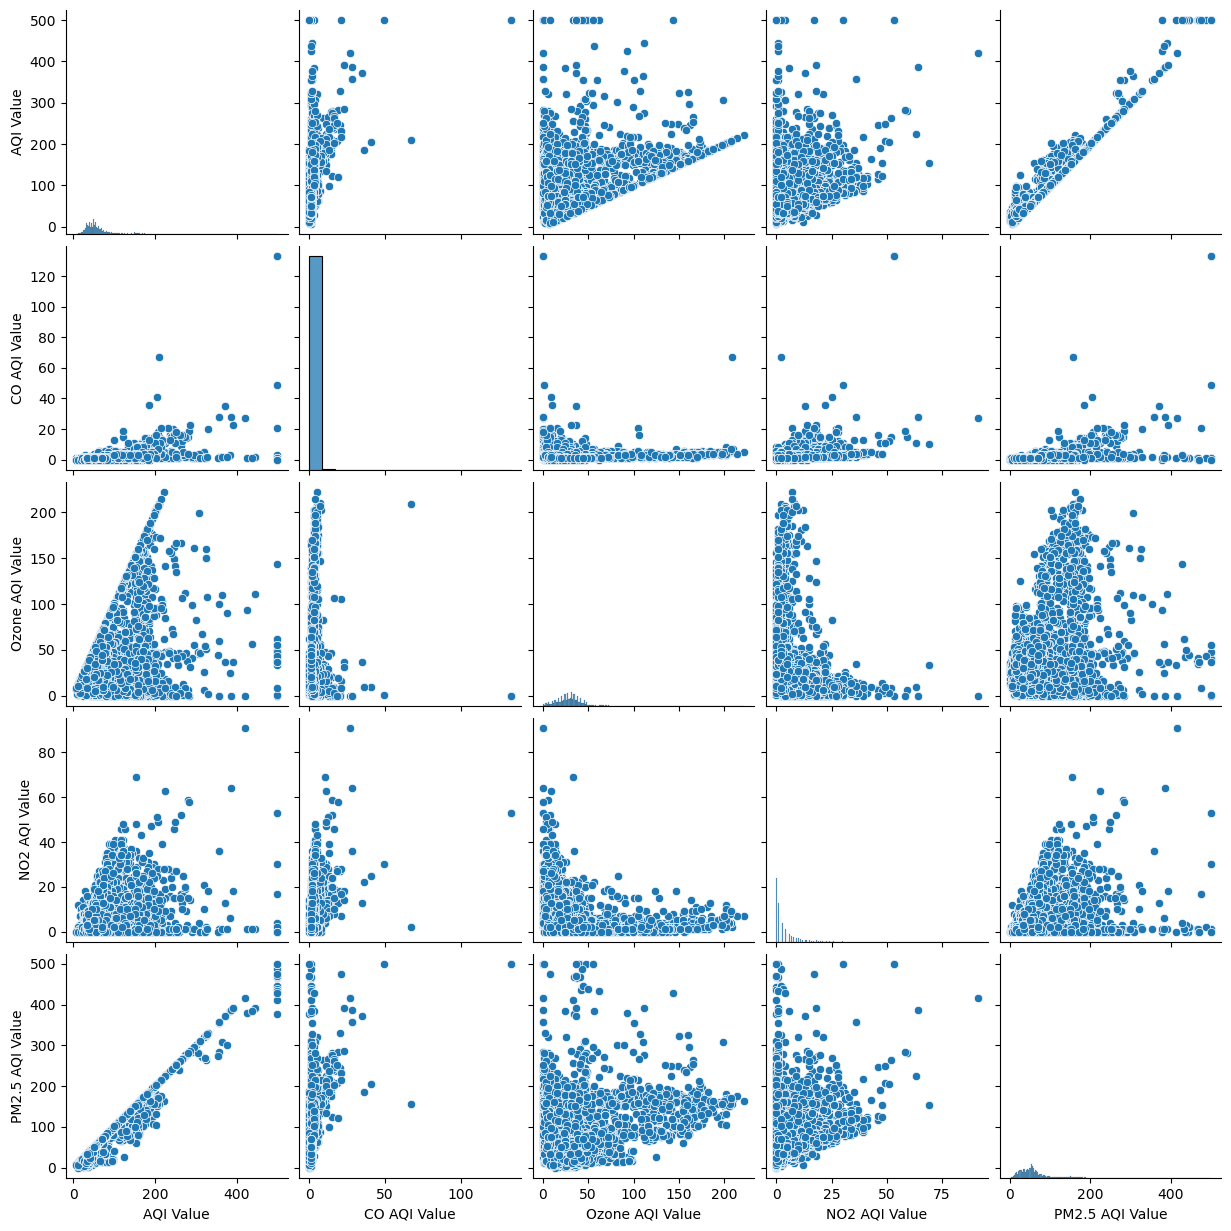

In [78]:
sns.pairplot(data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])

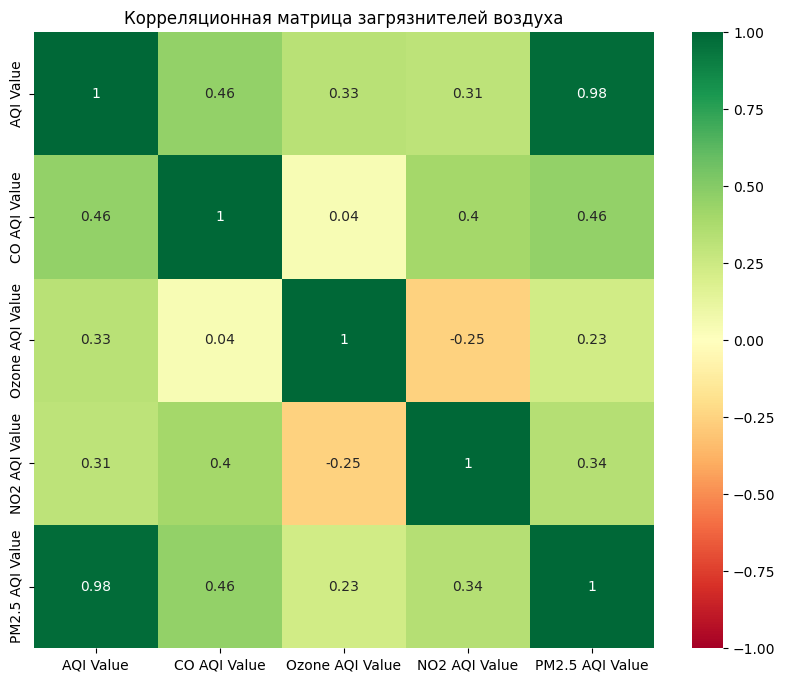

In [17]:
corr_matrix = data[['AQI Value','CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Корреляционная матрица загрязнителей воздуха')
plt.show()

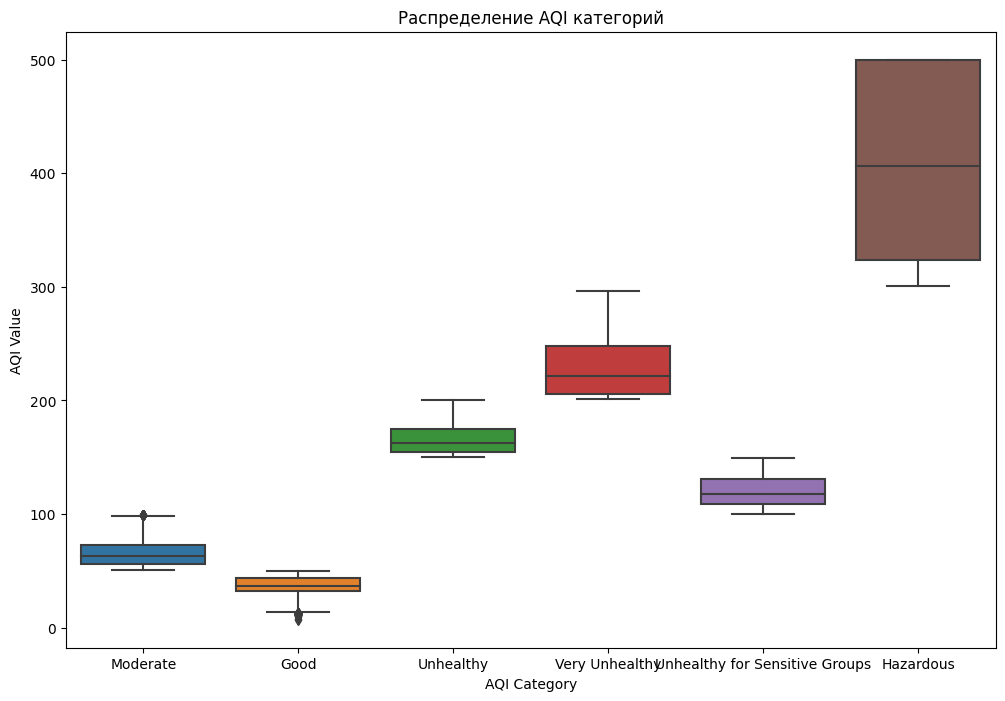

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='AQI Category', y='AQI Value')
plt.title('Распределение AQI категорий')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

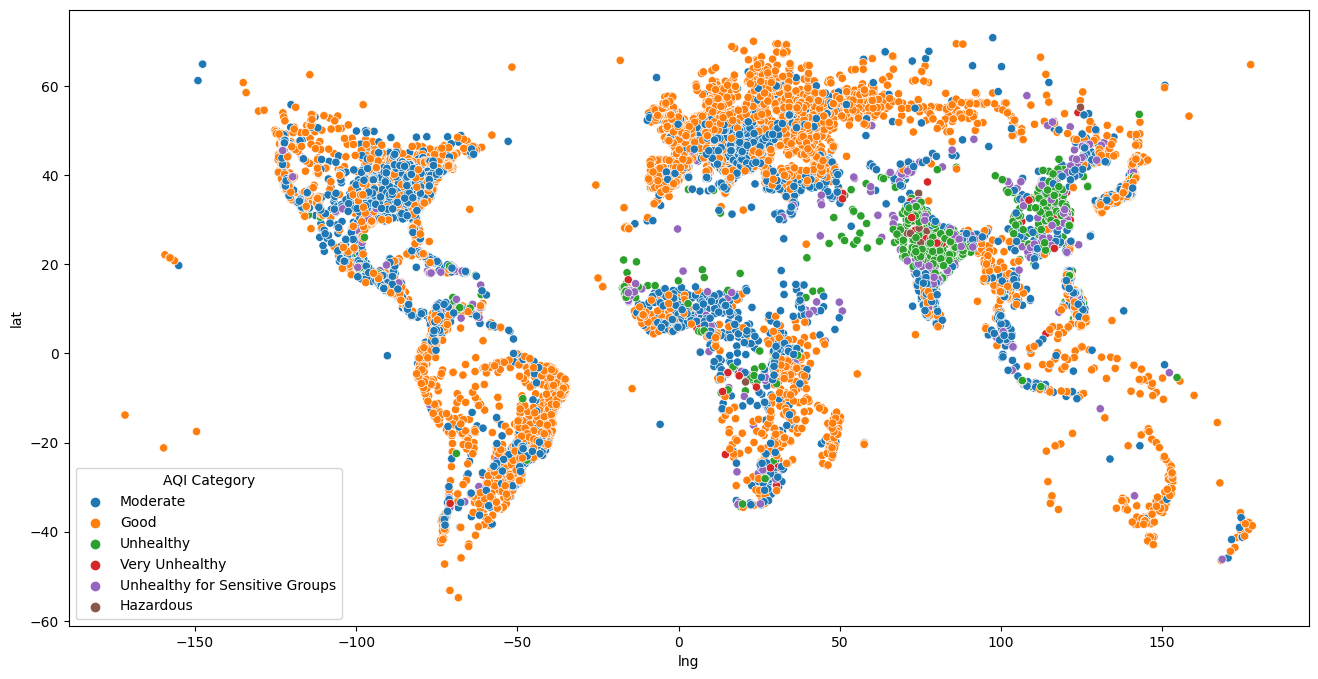

In [19]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='AQI Category')
plt.show()

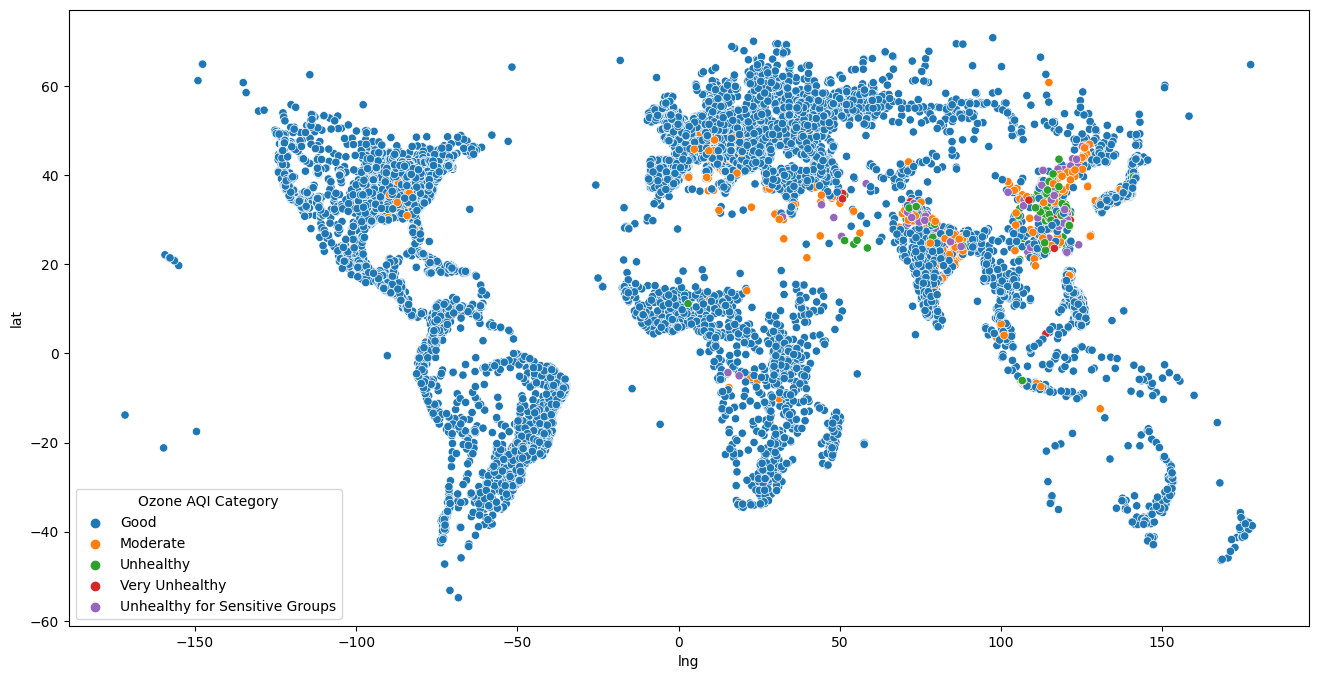

In [20]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='Ozone AQI Category')
plt.show()

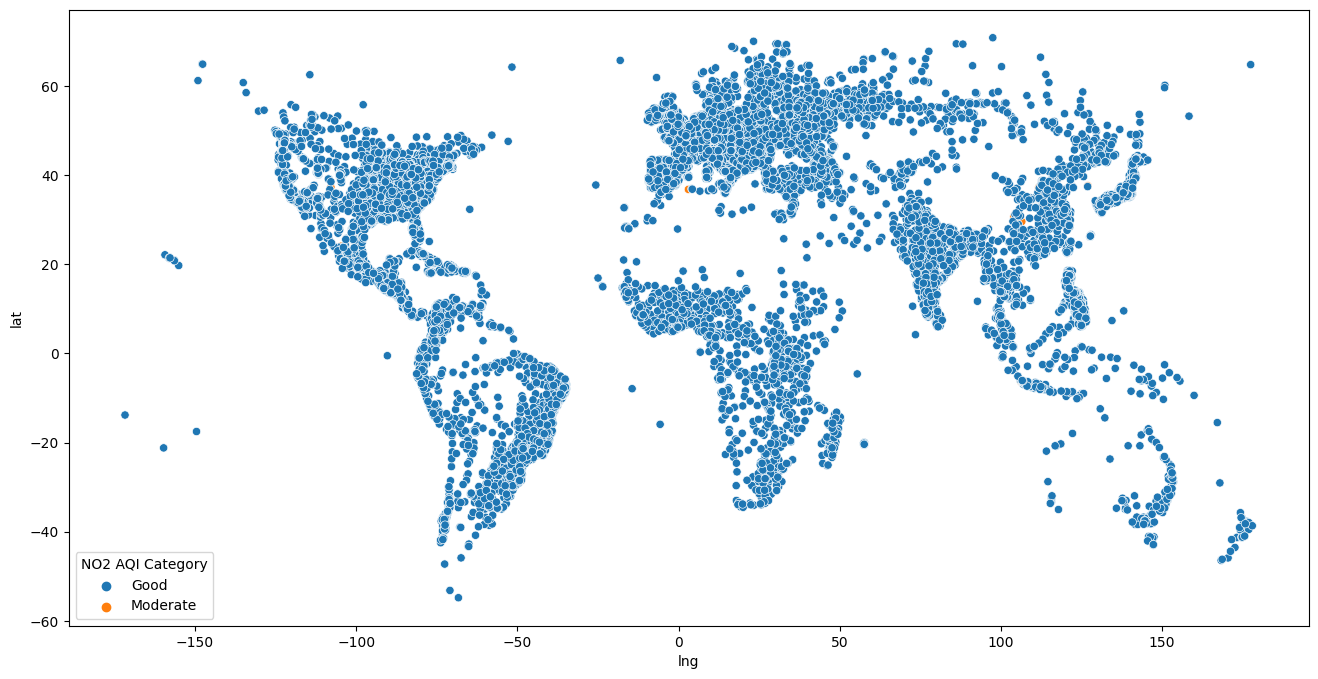

In [21]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='NO2 AQI Category')
plt.show()

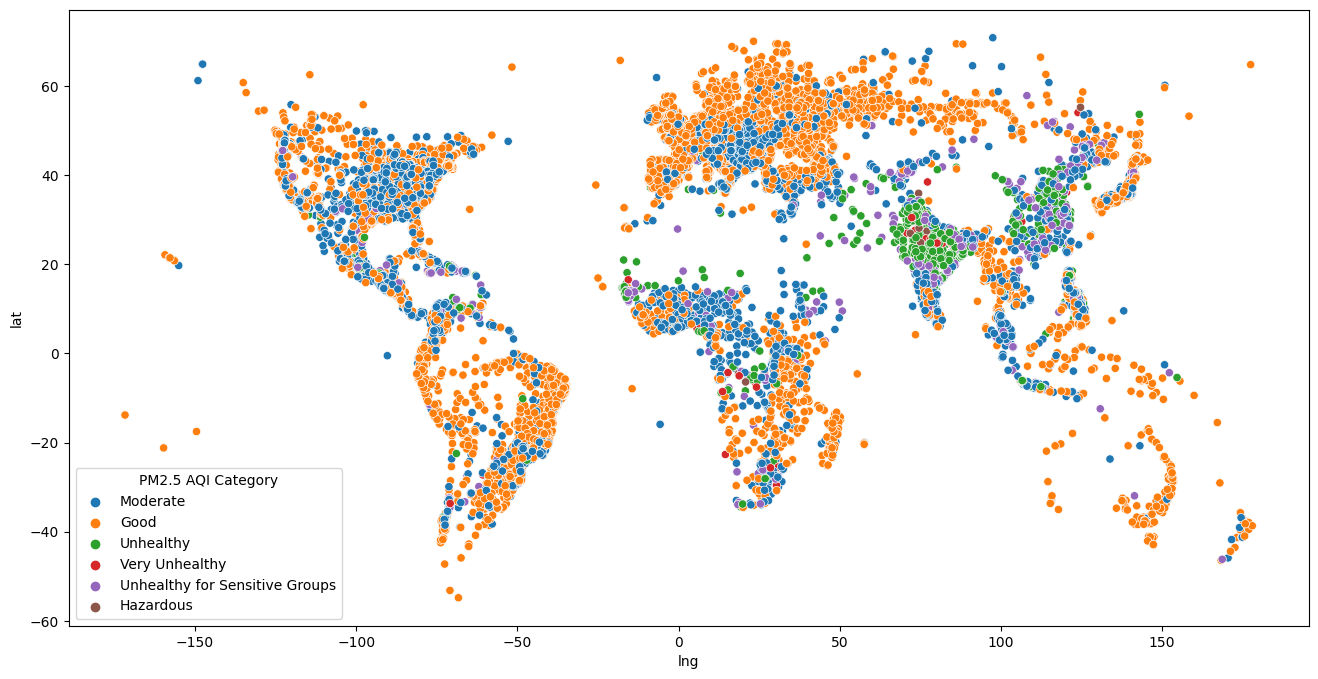

In [22]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='PM2.5 AQI Category')
plt.show()

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
# Создали Pipeline. В узком смысле пайплайн – это модуль sklearn.pipeline, который позволяет автоматизировать предварительные преобразования данных перед обучением модели. 
# Добавили в него SimpleImputer. С помощью этого класса мы можем заменить значения NaN(отсутствующие значения) в наборе данных указанным заполнителем. 
# И добавили StandardScaler, который необходим для стандартизации значений данных в стандартный формат.

# Пайплайн
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaller', StandardScaler())
])

dataTransformed = data.drop(['AQI Value', 'Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category', 'lat', 'lng'], axis = 1)
outcome = data['AQI Value']

data_prepared = pipeline.fit_transform(dataTransformed)

In [126]:
# Разделяем данные для обучения и теста

from sklearn.model_selection import train_test_split 
data_train, data_test, outcome_train, outcome_test = train_test_split(data_prepared, outcome, test_size = 0.20)

In [127]:
# Линейная регрессия
linearRegression = LinearRegression().fit(data_prepared,outcome)

some_data = dataTransformed.iloc[:5]
some_output = outcome.iloc[:5]
data_prepared_some = pipeline.transform(some_data)

# Обучили модель с помощью алгоритма «Линейной регрессии». Сравнили первые 5 объектов. Вывели прогнозы и метки для них. 
print("Линейная регрессия. Прогнозы:", linearRegression.predict(data_prepared_some))
print("Линейная регрессия. Метки:",list(some_output))
# Если округлять полученные значения, то можно сделать вывод, что они совпадают с метками. 

Линейная регрессия. Прогнозы: [55.26610658 39.53343899 39.53343899 70.10358655 25.65674441]
Линейная регрессия. Метки: [51, 41, 41, 66, 34]


In [128]:
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(outcome, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print("Среднеквадратическое отклонение. Линейная регрессия:",lin_rmse)

Среднеквадратическое отклонение. Линейная регрессия: 7.220820083098583


In [129]:
print("Линейная регрессия r2 score:", r2_score(list(some_output), y_pred))

Линейная регрессия r2 score: 0.9821775761503565


In [130]:
# Метод опорных векторов
svclassifier = SVC(kernel='linear') 
svclassifier.fit(data_train, outcome_train)

y_pred = svclassifier.predict(data_prepared_some)
print("Метод опорных векторов. Прогнозы:", svclassifier.predict(data_prepared_some))
print("Метод опорных векторов. Метки:",list(some_output))

Метод опорных векторов. Прогнозы: [52 39 39 64 35]
Метод опорных векторов. Метки: [51, 41, 41, 66, 34]


In [131]:
data_predictions = svclassifier.predict(data_prepared)
linear_mse = mean_squared_error(outcome, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print("Среднеквадратическое отклонение. Метод опорных векторов:",lin_rmse)

Среднеквадратическое отклонение. Метод опорных векторов: 5.49714729035305


In [132]:
print("Метод опорных векторов r2 score:", r2_score(list(some_output), y_pred))

Метод опорных векторов r2 score: 0.9773169151004537


In [133]:
knnclassifier = KNeighborsClassifier(n_neighbors=5) 
knnclassifier.fit(data_train, outcome_train)

y_pred = knnclassifier.predict(data_prepared_some)
print("Метод k-ближайших соседей. Прогнозы:", knnclassifier.predict(data_prepared_some))
print("Метод k-ближайших соседей. Метки:",list(some_output))

Метод k-ближайших соседей. Прогнозы: [51 41 41 66 34]
Метод k-ближайших соседей. Метки: [51, 41, 41, 66, 34]


In [134]:
data_predictions = knnclassifier.predict(data_prepared)
linear_mse = mean_squared_error(outcome, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print("Среднеквадратическое отклонение. Метод k-ближайших соседей:",lin_rmse)

Среднеквадратическое отклонение. Метод k-ближайших соседей: 5.852110709855659


In [135]:
print("Метод k-ближайших соседей r2 score:", r2_score(list(some_output), y_pred))

Метод k-ближайших соседей r2 score: 1.0
